In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score



In [16]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,105.000000,105.000000,105.000000,105.000000
mean,5.800000,3.038095,3.738095,1.190476
std,0.844553,0.418877,1.788660,0.783057
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.600000,0.200000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9555555555555556
Cross Validation Scores: 0.9533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



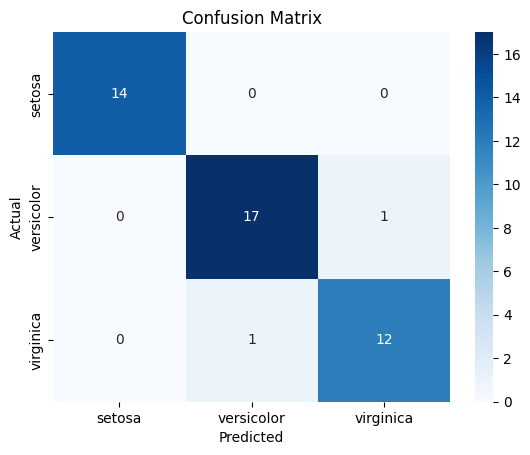

In [18]:
y_pred = clf.predict(X_test)
cross_scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Cross Validation Scores:", cross_scores.mean())   
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')    
plt.show()



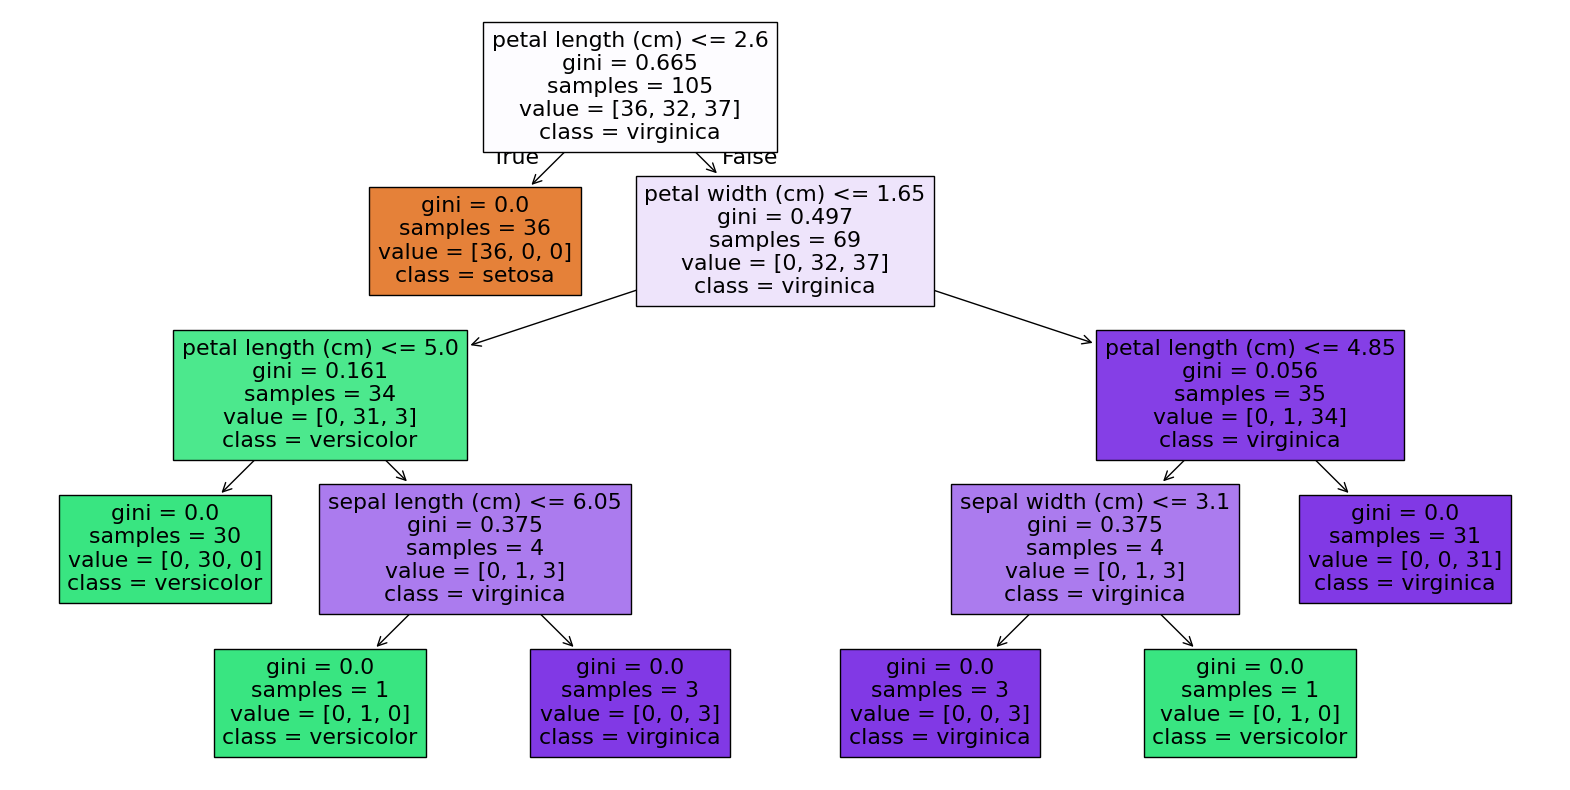

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()